In [21]:
%matplotlib inline
from keras.models import Sequential
from keras import optimizers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import GlobalMaxPooling2D, ZeroPadding2D
from keras.models import Model
from keras.preprocessing import image

## 0. Basics
- Input of image-format data is usually 4-D array in Tensorflow
<br> **(num_instance, width, height, depth)** </br>
    - **num_instance:** number of data instances. Usually designated as **None** to accomodate fluctuating data size
    - **width:** width of an image
    - **height:** height of an image
    - **depth:** depth of an image. Color images are usually with depth = 3 (3 channels for RGB). Black/white images are usually with depth = 1 (only one channel)
    
<img src="http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png" style="width: 400px"/>

- Loading image
    - Images can be loaded using load_img() function
    - Images can be converted to numpy array using img_to_array() function

In [3]:
img = image.load_img('./data/dog.jpg', target_size = (100, 100))

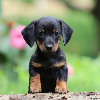

In [4]:
img

In [5]:
img = image.img_to_array(img)

In [6]:
print(img.shape)

(100, 100, 3)


## Convolution: FIlter/kernels
### No padding, no strides
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

[A cool vsualization on CNN](https://www.cs.cmu.edu/~aharley/vis/conv/)

In [19]:
x1 = Input(shape=(10,10,1))
x2 = Conv2D(filters=2,kernel_size=(3,3),padding='valid')(x1)
x3 = Conv2D(filters=3,kernel_size=(3,3),padding='same')(x2)


model = Model(inputs=x1,outputs=x3)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 10, 10, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 2)           20        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 3)           57        
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [36]:
k0 = np.array([[0,0,0],[0,1,0],[0,0,0]])
k1 = np.array([[0,-1,0],[0,0,0],[0,1,0]])
k1

array([[ 0, -1,  0],
       [ 0,  0,  0],
       [ 0,  1,  0]])

(3, 3, 1, 1)
(1,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 10, 10, 1)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


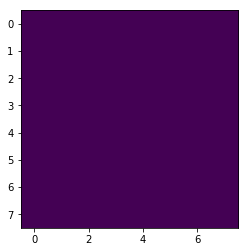

In [37]:
import numpy as np
import pylab as plt

def init1(shape, dtype=None):
    print(shape)
    return k1.reshape(shape).astype(dtype)

def init2(shape, dtype=None):
    print(shape)
    return np.zeros(shape).astype(dtype)

x1 = Input(shape=(10,10,1))
x2 = Conv2D(filters=1,kernel_size=(3,3),padding='valid',
            kernel_initializer=init1,
            bias_initializer=init2)(x1)

model = Model(inputs=x1,outputs=x2)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()

x = np.ones((1,10,10,1))
x = np.zeros((1,10,10,1))
for i in range(10):
    x[0,i,:,0] = i

y = model.predict(x)
y.shape
plt.imshow(y[0,:,:,0])

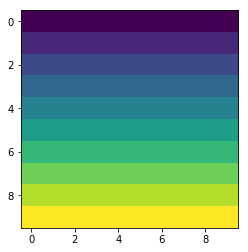

In [38]:
plt.imshow(x[0,:,:,0])

In [39]:
y[0,:,:,0]

array([[2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2.]], dtype=float32)

In [28]:
Conv2D(filters = 10,
       kernel_size = (5,3),
       strides = (1,1), padding = 'valid')

## Padding
### ZeroPadding
Customized paddings can be given with ZeroPadding**n**D layer

In [ ]:
# user-customized padding
input_layer = Input(shape = (10, 10, 3))
padding_layer = ZeroPadding2D(padding = (1,1))(input_layer)

model = Model(inputs = input_layer, outputs = padding_layer)

### Padding: same
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif)

In [ ]:
Conv2D(input_shape = (10, 10, 3),
       filters = 10,
       kernel_size = (3,3),
       strides = (1,1), padding = 'same')

## Stride

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif)

In [ ]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (2,2), padding = 'valid')

In [45]:
x1 = Input(shape=(16,15,1))
x2 = Conv2D(filters=1,kernel_size=(3,3),
            padding='same',
            strides=(2,3))(x1)

model = Model(inputs=x1,outputs=x2)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 16, 15, 1)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 5, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


## Padding+Stride

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif)

### Dilated convolution

In [16]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1),
       padding = 'same', dilation_rate=(1, 1))

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif)

## Pooling
- Usually, max pooling is applied for rectangular region
- pooling size, padding type, and strides can be set similar to convolutional layer
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

### MaxPooling layer

<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [25]:
# when 'strides' parameter is not defined, strides are equal to 'pool_size'
MaxPooling2D(pool_size = (2,2), padding = 'valid')

### So a 2D Convolutional Layer Includes:
- Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
- Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
- Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
- Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

[ref](https://keras.io/layers/convolutional/)

### Convolution+Pooling

In [30]:
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'valid'))

In [49]:
x1 = Input(shape=(16,16,1))
x2 = Conv2D(filters=1,kernel_size=(3,3),
            padding='same',
            strides=(2,2))(x1)
x3 = MaxPooling2D(pool_size = (2,2), strides = (2,2))(x2)

model = Model(inputs=x1,outputs=x3)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 16, 16, 1)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [33]:
# globalmaxpooling performs maxpooling over whole channel with depth = 1
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same')
GlobalMaxPooling2D()

In [51]:
x1 = Input(shape=(16,16,1))
x2 = Conv2D(filters=5,kernel_size=(3,3),
            padding='same',
            strides=(2,2))(x1)
x3 = GlobalMaxPooling2D()(x2)

model = Model(inputs=x1,outputs=x3)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 16, 16, 1)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 8, 5)           50        
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 5)                 0         
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


## 4. Flattening
- To be connected to fully connected layer (dense layer), convolutional/pooling layer should be **"flattened"**
- Resulting shape = **(Number of instances, width X height X depth)**

In [55]:
x1 = Input(shape=(16,16,1))
x2 = Conv2D(filters=1,kernel_size=(3,3),
            padding='same',
            strides=(2,2))(x1)
x3 = MaxPooling2D(pool_size = (2,2), strides = (2,2))(x2)
x4 = Flatten()(x3)

model = Model(inputs=x1,outputs=x4)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 16, 16, 1)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 1)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16)                0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


## 5. Fully Connected (Dense)
- After flattening layer, fully connected layer can be added
- output shape (number of nodes) should be designated

In [46]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Flatten())
model.add(Dense(50))

In [47]:
print(model.output_shape)

(None, 50)
